In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
#import and split data
all_results = pd.read_excel("all_student_data.xlsx", index_col="Student ID")

print(all_results.columns)

#print(results.columns)
results = pd.melt(all_results, id_vars=["Full Name", "programme", "cohort", "reg_group", "status"], var_name="assessment", value_name="grade").reset_index(drop=True)

#split by cohort
jan_results = results[results["cohort"] == "January"].reset_index(drop=True)
sept_results = results[results["cohort"] == "September"].reset_index(drop=True)
mar_results = results[results["cohort"] == "March"].reset_index(drop=True)

#split by programme
ify_results = results[results["programme"] == "IFY"].reset_index(drop=True)
iy1_results = results[results["programme"] == "IY1"].reset_index(drop=True)
pmp_results = results[results["programme"] == "PMP"].reset_index(drop=True)

#split by programme and cohort
sept_ify_results = results[(results["programme"] == "IFY") & (results["cohort"] == "September")].reset_index(drop=True)
sept_iy1_results = results[(results["programme"] == "IY1") & (results["cohort"] == "September")].reset_index(drop=True)
jan_ify_results = results[(results["programme"] == "IFY") & (results["cohort"] == "January")].reset_index(drop=True)
jan_iy1_results = results[(results["programme"] == "IY1") & (results["cohort"] == "January")].reset_index(drop=True)
mar_pmp_results = results[(results["programme"] == "PMP") & (results["cohort"] == "March")].reset_index(drop=True)


Index(['Full Name', 'programme', 'cohort', 'reg_group', 'EX1 Listening',
       'EX3 Reading', 'EX3 Writing', 'EX2 Speaking', 'CW1', 'CW2', 'CW3',
       'status'],
      dtype='object')


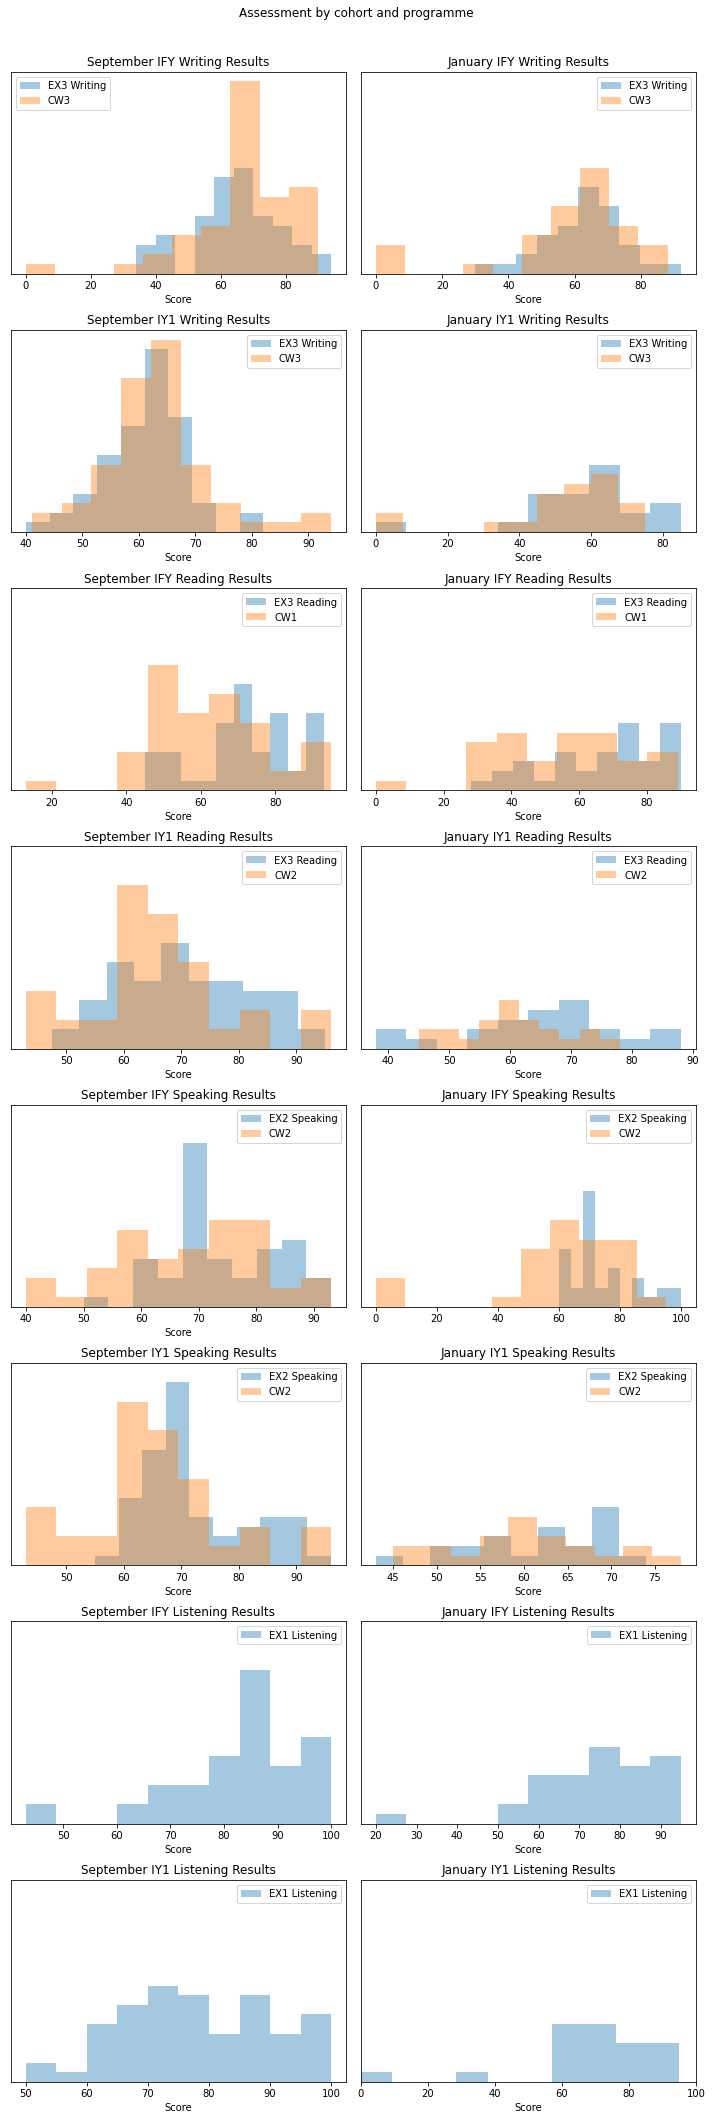

In [4]:
#plot cohort-programme histograms
fig, axs = plt.subplots(8,2, figsize=(10,30), sharey=True)
fig.suptitle("Assessment by cohort and programme")

#writing
axs[0,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,0].set_title("September IFY Writing Results")
axs[0,0].legend()
axs[0,0].set_yticks([])
axs[0,0].set_xlabel("Score")


axs[0,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,1].set_title("January IFY Writing Results")
axs[0,1].legend()
axs[0,1].set_xlabel("Score")

axs[1,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[1,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[1,0].set_title("September IY1 Writing Results")
axs[1,0].legend()
axs[1,0].set_xlabel("Score")

axs[1,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[1,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[1,1].set_title("January IY1 Writing Results")
axs[1,1].legend()
axs[1,1].set_xlabel("Score")

#Reading
axs[2,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[2,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[2,0].set_title("September IFY Reading Results")
axs[2,0].legend()
axs[2,0].set_yticks([])
axs[2,0].set_xlabel("Score")

axs[2,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[2,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[2,1].set_title("January IFY Reading Results")
axs[2,1].legend()
axs[2,1].set_xlabel("Score")

axs[3,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[3,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[3,0].set_title("September IY1 Reading Results")
axs[3,0].legend()
axs[3,0].set_xlabel("Score")


axs[3,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[3,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[3,1].set_title("January IY1 Reading Results")
axs[3,1].legend()
axs[3,1].set_xlabel("Score")

#Speaking
axs[4,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[4,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[4,0].set_title("September IFY Speaking Results")
axs[4,0].legend()
axs[4,0].set_yticks([])
axs[4,0].set_xlabel("Score")


axs[4,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[4,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[4,1].set_title("January IFY Speaking Results")
axs[4,1].legend()
axs[4,0].set_xlabel("Score")

axs[5,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[5,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[5,0].set_title("September IY1 Speaking Results")
axs[5,0].legend()
axs[5,0].set_xlabel("Score")

axs[5,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[5,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[5,1].set_title("January IY1 Speaking Results")
axs[5,1].legend()
axs[5,1].set_xlabel("Score")

#Listening
axs[6,0].hist(sept_ify_results["grade"][sept_ify_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[6,0].set_title("September IFY Listening Results")
axs[6,0].legend()
axs[6,0].set_yticks([])
axs[6,0].set_xlabel("Score")


axs[6,1].hist(jan_ify_results["grade"][jan_ify_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[6,1].set_title("January IFY Listening Results")
axs[6,1].legend()
axs[6,1].set_xlabel("Score")

axs[7,0].hist(sept_iy1_results["grade"][sept_iy1_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[7,0].set_title("September IY1 Listening Results")
axs[7,0].legend()
axs[7,0].set_xlabel("Score")

axs[7,1].hist(jan_iy1_results["grade"][jan_iy1_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[7,1].set_title("January IY1 Listening Results")
axs[7,1].legend()
axs[7,1].set_xlabel("Score")

plt.xlim(0,100)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

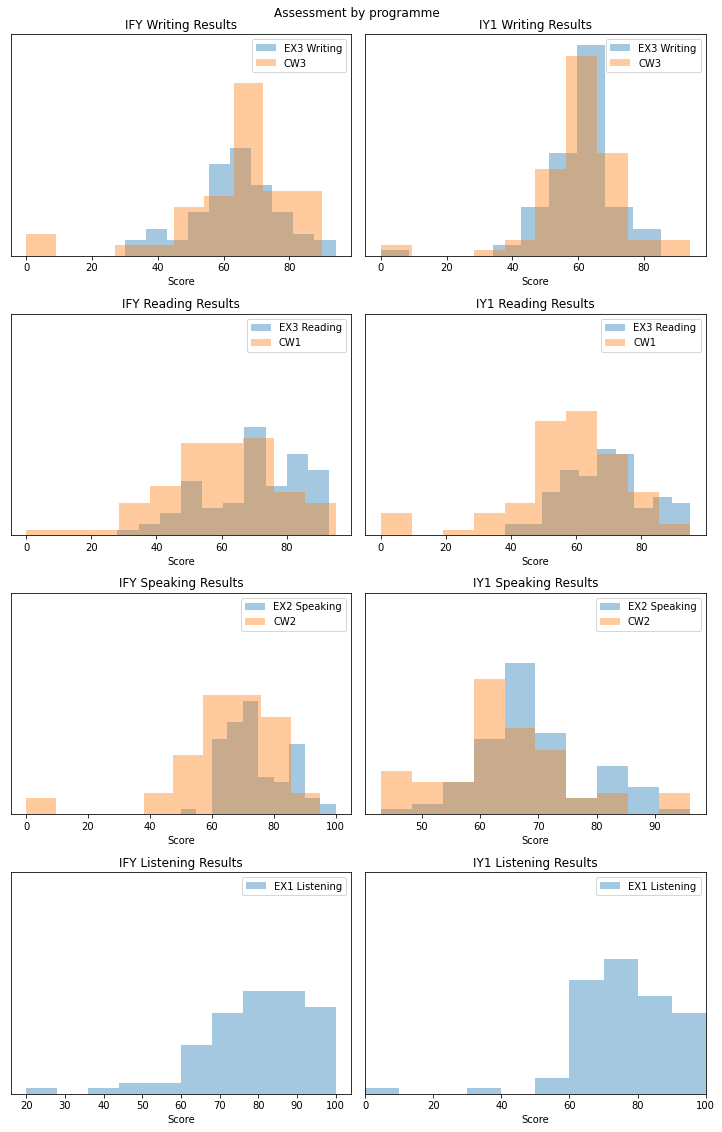

In [5]:
#plot programme histograms
fig, axs = plt.subplots(4,2, figsize=(10,16), sharey=True)
fig.suptitle("Assessment by programme")

#writing
axs[0,0].hist(ify_results["grade"][ify_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,0].hist(ify_results["grade"][ify_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,0].set_title("IFY Writing Results")
axs[0,0].legend()
axs[0,0].set_yticks([])
axs[0,0].set_xlabel("Score")


axs[0,1].hist(iy1_results["grade"][iy1_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,1].hist(iy1_results["grade"][iy1_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,1].set_title("IY1 Writing Results")
axs[0,1].legend()
axs[0,1].set_xlabel("Score")

#reading
axs[1,0].hist(ify_results["grade"][ify_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[1,0].hist(ify_results["grade"][ify_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[1,0].set_title("IFY Reading Results")
axs[1,0].legend()
axs[1,0].set_yticks([])
axs[1,0].set_xlabel("Score")


axs[1,1].hist(iy1_results["grade"][iy1_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[1,1].hist(iy1_results["grade"][iy1_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[1,1].set_title("IY1 Reading Results")
axs[1,1].legend()
axs[1,1].set_xlabel("Score")

#speaking
axs[2,0].hist(ify_results["grade"][ify_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[2,0].hist(ify_results["grade"][ify_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[2,0].set_title("IFY Speaking Results")
axs[2,0].legend()
axs[2,0].set_yticks([])
axs[2,0].set_xlabel("Score")


axs[2,1].hist(iy1_results["grade"][iy1_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[2,1].hist(iy1_results["grade"][iy1_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[2,1].set_title("IY1 Speaking Results")
axs[2,1].legend()
axs[2,1].set_xlabel("Score")

#listening
axs[3,0].hist(ify_results["grade"][ify_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[3,0].set_title("IFY Listening Results")
axs[3,0].legend()
axs[3,0].set_yticks([])
axs[3,0].set_xlabel("Score")


axs[3,1].hist(iy1_results["grade"][iy1_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[3,1].set_title("IY1 Listening Results")
axs[3,1].legend()
axs[3,1].set_xlabel("Score")

plt.tight_layout()
plt.xlim(0,100)
plt.show()


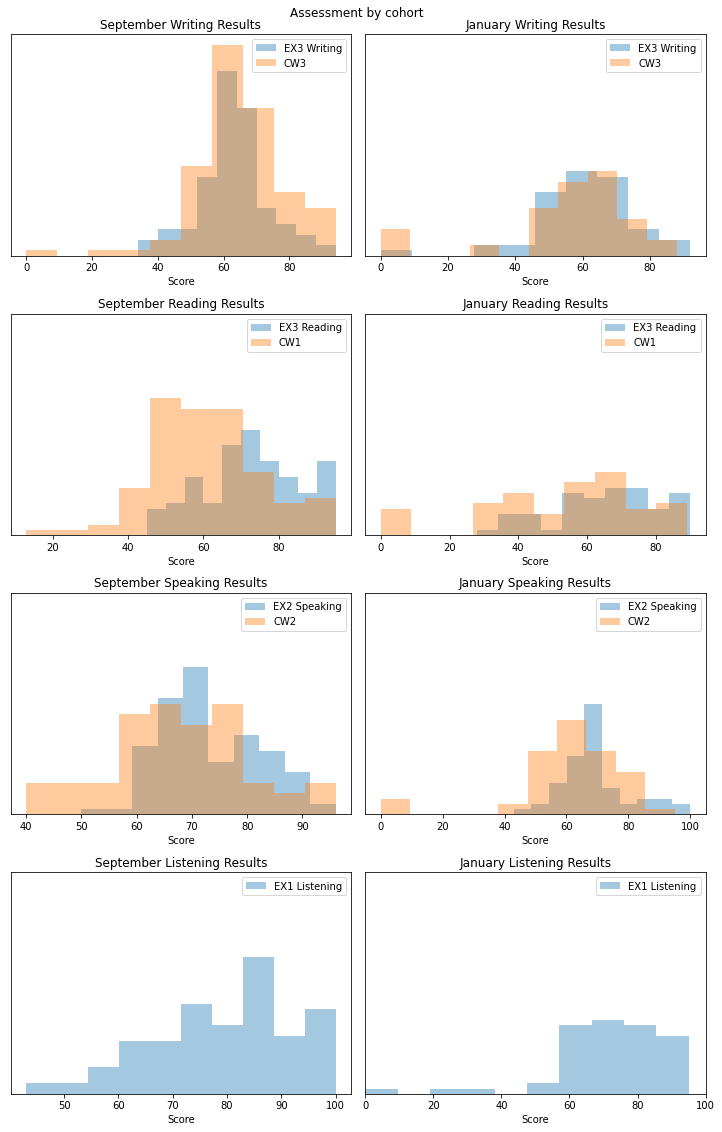

In [6]:
#plot cohort histograms
fig, axs = plt.subplots(4,2, figsize=(10,16), sharey=True)
fig.suptitle("Assessment by cohort")

#writing
axs[0,0].hist(sept_results["grade"][sept_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,0].hist(sept_results["grade"][sept_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,0].set_title("September Writing Results")
axs[0,0].legend()
axs[0,0].set_yticks([])
axs[0,0].set_xlabel("Score")


axs[0,1].hist(jan_results["grade"][jan_results["assessment"] == "EX3 Writing"], alpha=0.4, label="EX3 Writing")
axs[0,1].hist(jan_results["grade"][jan_results["assessment"] == "CW3"], alpha=0.4, label="CW3")
axs[0,1].set_title("January Writing Results")
axs[0,1].legend()
axs[0,1].set_xlabel("Score")

#reading
axs[1,0].hist(sept_results["grade"][sept_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[1,0].hist(sept_results["grade"][sept_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[1,0].set_title("September Reading Results")
axs[1,0].legend()
axs[1,0].set_yticks([])
axs[1,0].set_xlabel("Score")

axs[1,1].hist(jan_results["grade"][jan_results["assessment"] == "EX3 Reading"], alpha=0.4, label="EX3 Reading")
axs[1,1].hist(jan_results["grade"][jan_results["assessment"] == "CW1"], alpha=0.4, label="CW1")
axs[1,1].set_title("January Reading Results")
axs[1,1].legend()
axs[1,1].set_xlabel("Score")

#speaking
axs[2,0].hist(sept_results["grade"][sept_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[2,0].hist(sept_results["grade"][sept_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[2,0].set_title("September Speaking Results")
axs[2,0].legend()
axs[2,0].set_yticks([])
axs[2,0].set_xlabel("Score")


axs[2,1].hist(jan_results["grade"][jan_results["assessment"] == "EX2 Speaking"], alpha=0.4, label="EX2 Speaking")
axs[2,1].hist(jan_results["grade"][jan_results["assessment"] == "CW2"], alpha=0.4, label="CW2")
axs[2,1].set_title("January Speaking Results")
axs[2,1].legend()
axs[2,1].set_xlabel("Score")

#listening
axs[3,0].hist(sept_results["grade"][sept_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[3,0].set_title("September Listening Results")
axs[3,0].legend()
axs[3,0].set_yticks([])
axs[3,0].set_xlabel("Score")


axs[3,1].hist(jan_results["grade"][jan_results["assessment"] == "EX1 Listening"], alpha=0.4, label="EX1 Listening")
axs[3,1].set_title("January Listening Results")
axs[3,1].legend()
axs[3,1].set_xlabel("Score")

plt.tight_layout()
plt.xlim(0,100)
plt.show()


                 Full Name programme     cohort reg_group status  \
0            Ahmed ALDEREI       IFY  September     SFMEA   pass   
1                Jonas YOU       IFY  September     SFSCA   pass   
2               Xiyu CHENG       IFY  September      SFAS   pass   
3             Ting-Yao LIN       IFY  September     SFMEA   fail   
4            Ali MOSTAFAWI       IFY  September     SFMEA   pass   
..                     ...       ...        ...       ...    ...   
345       Michael MUNTHALI       IFY  September      SFAS   pass   
346        Kimberly ACOSTA       IFY  September      SFAS   pass   
347         Albert KANOKOV       IFY  September     SFMEA   pass   
348      Alwalid ALKALBANI       IFY  September     SFMEA   pass   
349  Martina MAZZUCHIRENDO       IFY  September      SFAS   pass   

        assessment  grade  
0    EX1 Listening   68.0  
1    EX1 Listening   68.0  
2    EX1 Listening   88.0  
3    EX1 Listening   43.0  
4    EX1 Listening   73.0  
..             

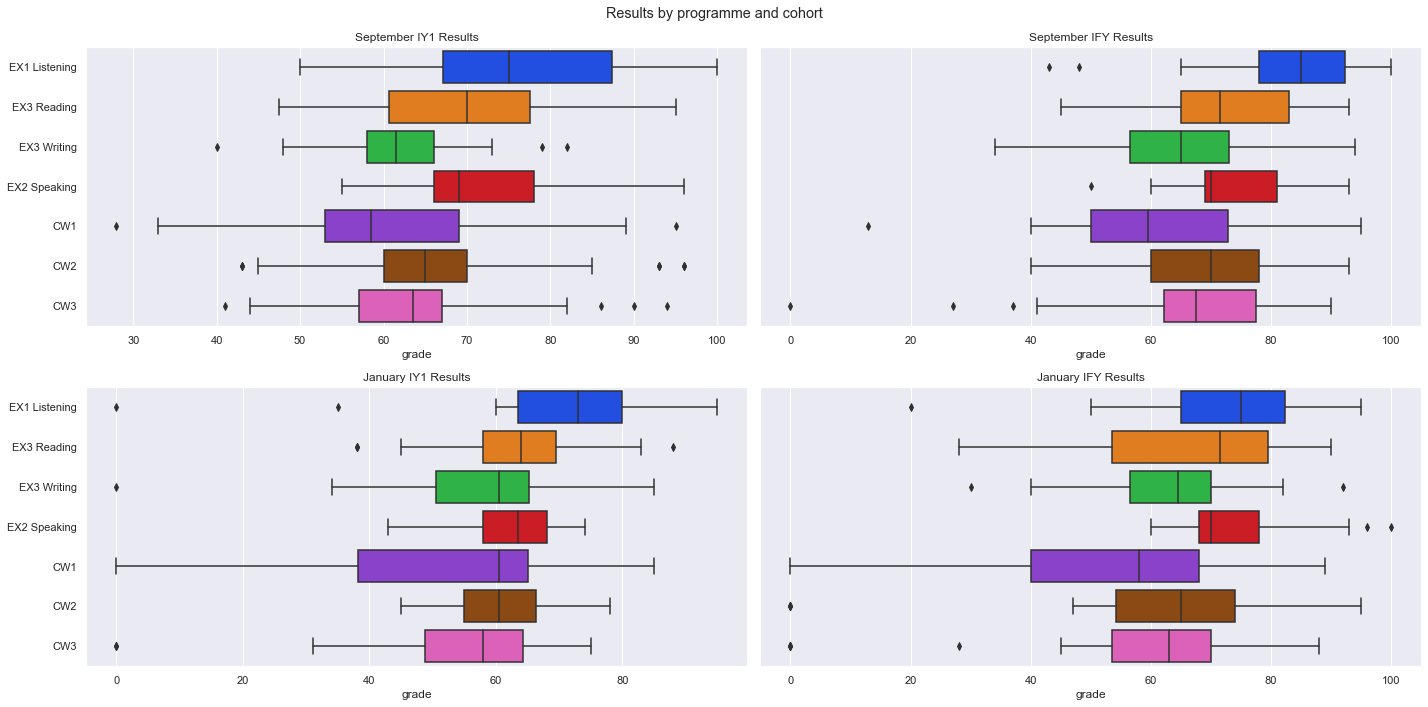

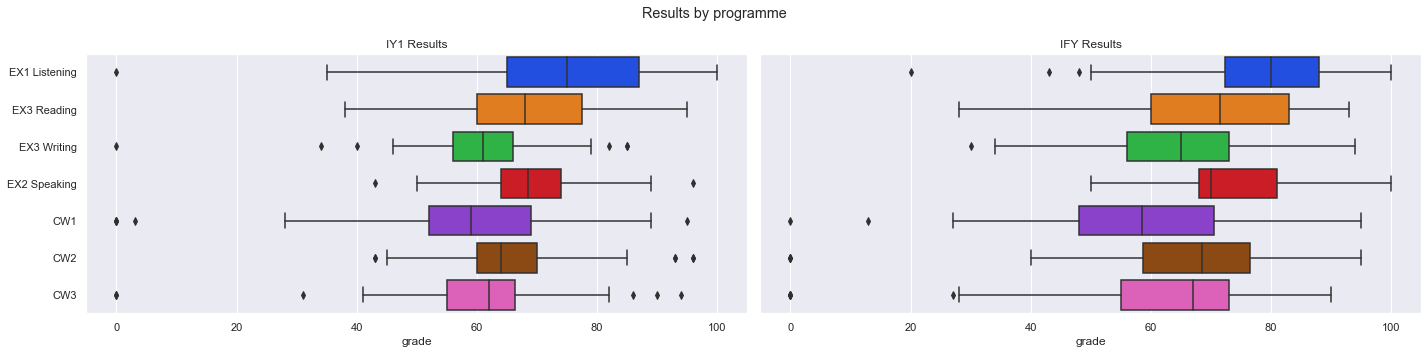

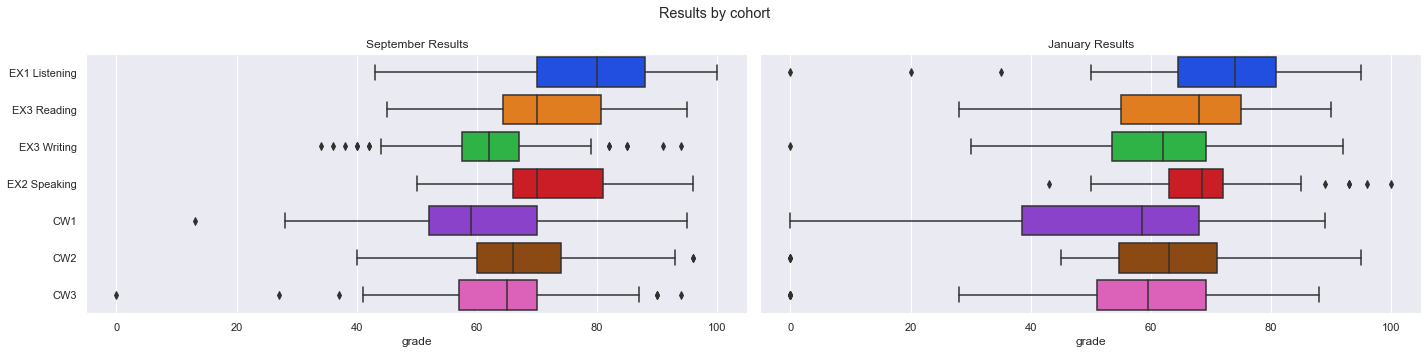

In [14]:
#boxplots
#cohort and programme
fig, axs = plt.subplots(2,2, figsize=(20,10), sharey=True)
fig.suptitle("Results by programme and cohort")
sns.set_theme(style="darkgrid", palette="bright")

sns.boxplot(y="assessment", x="grade", data=sept_iy1_results, ax=axs[0,0])
sns.boxplot(y="assessment", x="grade", data=sept_ify_results, ax=axs[0,1])
sns.boxplot(y="assessment", x="grade", data=jan_iy1_results, ax=axs[1,0])
sns.boxplot(y="assessment", x="grade", data=jan_ify_results, ax=axs[1,1])
axs[0,0].set_ylabel("")
axs[0,0].set_title("September IY1 Results")
axs[0,1].set_ylabel("")
axs[0,1].set_title("September IFY Results")
axs[1,0].set_ylabel("")
axs[1,0].set_title("January IY1 Results")
axs[1,1].set_ylabel("")
axs[1,1].set_title("January IFY Results")

plt.tight_layout()
plt.show()

#programme
fig, axs = plt.subplots(1,2, figsize=(20,5), sharey=True)
fig.suptitle("Results by programme")
sns.set_theme(style="darkgrid", palette="bright")

sns.boxplot(y="assessment", x="grade", data=iy1_results, ax=axs[0])
sns.boxplot(y="assessment", x="grade", data=ify_results, ax=axs[1])
axs[0].set_ylabel("")
axs[0].set_title("IY1 Results")
axs[1].set_ylabel("")
axs[1].set_title("IFY Results")


plt.tight_layout()
plt.show()

#cohort
fig, axs = plt.subplots(1,2, figsize=(20,5), sharey=True)
fig.suptitle("Results by cohort")
sns.set_theme(style="darkgrid", palette="bright")

sns.boxplot(y="assessment", x="grade", data=sept_results, ax=axs[0])
sns.boxplot(y="assessment", x="grade", data=jan_results, ax=axs[1])
axs[0].set_ylabel("")
axs[0].set_title("September Results")
axs[1].set_ylabel("")
axs[1].set_title("January Results")


plt.tight_layout()
plt.show()

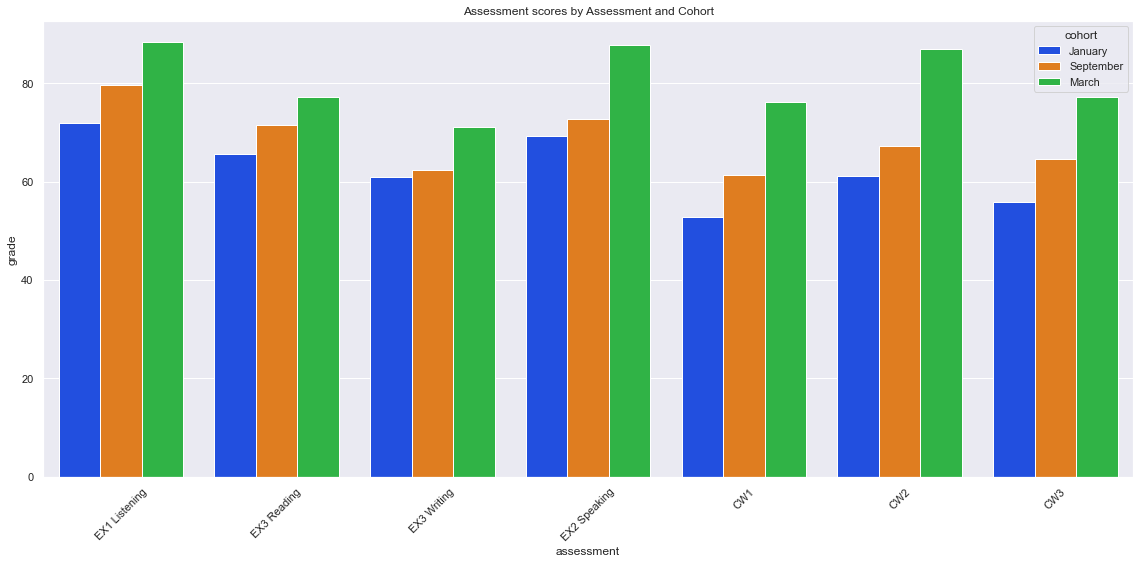

In [15]:
#plot results bar charts
fig, axs = plt.subplots(figsize=(16, 8))
sns.barplot(x="assessment", y="grade", hue="cohort", data=results, ci=None, ax=axs)
axs.set_xticks(range(0, 7))
axs.set_xticklabels(results.assessment.unique(), rotation=45)
axs.set_title("Assessment scores by Assessment and Cohort")
plt.tight_layout()
plt.show()

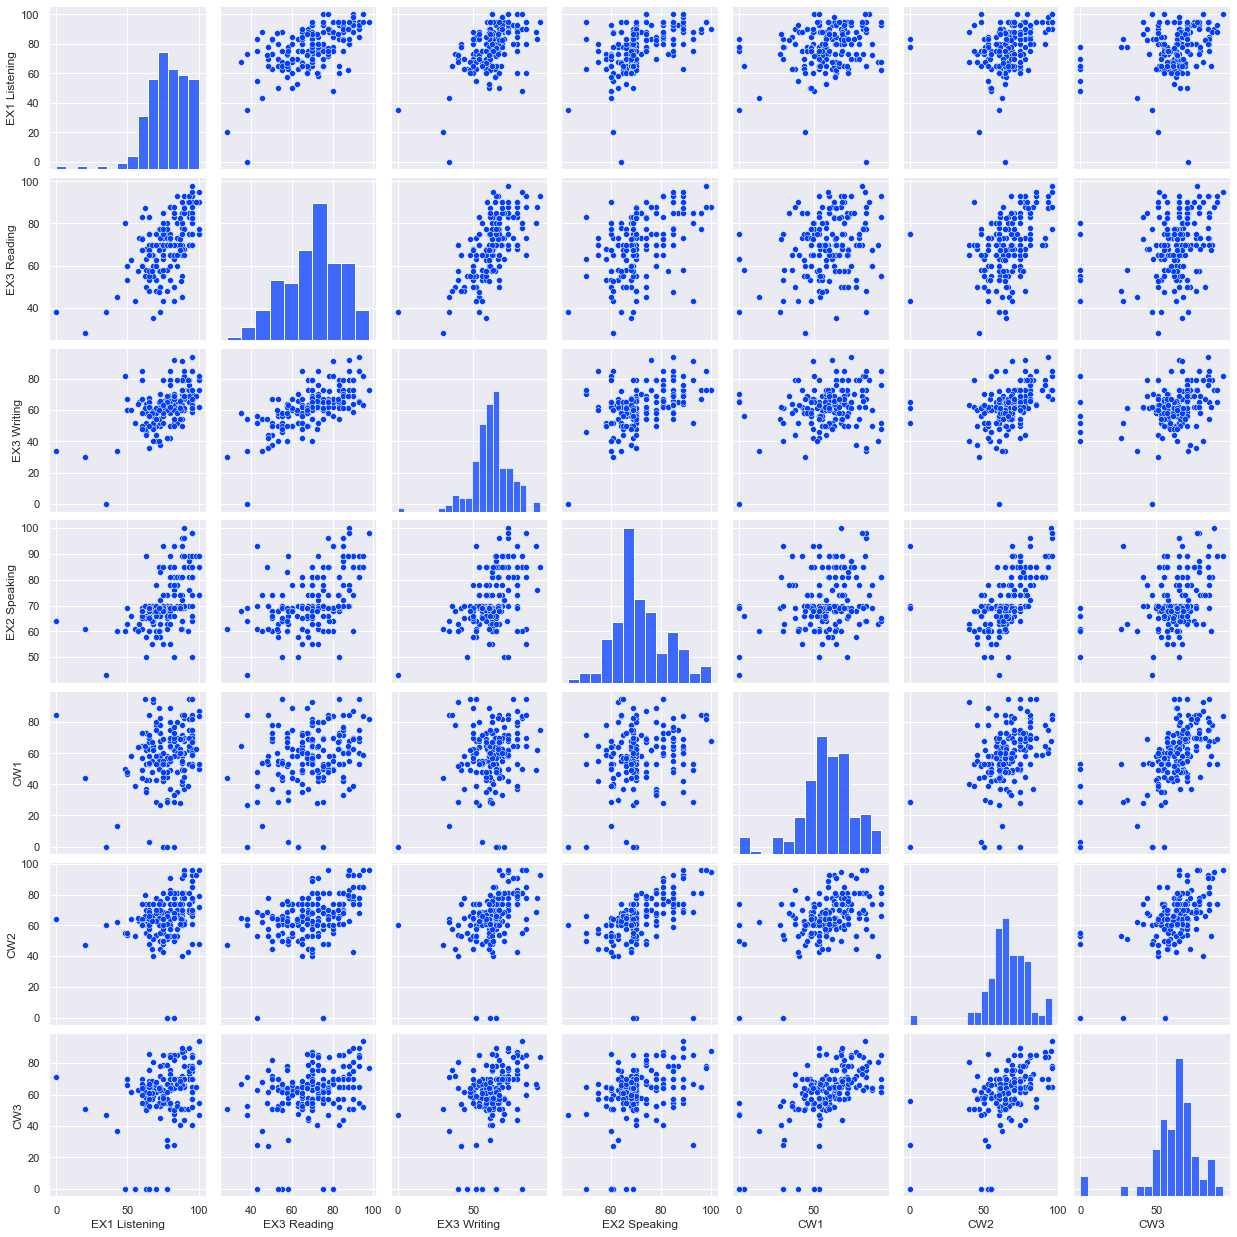

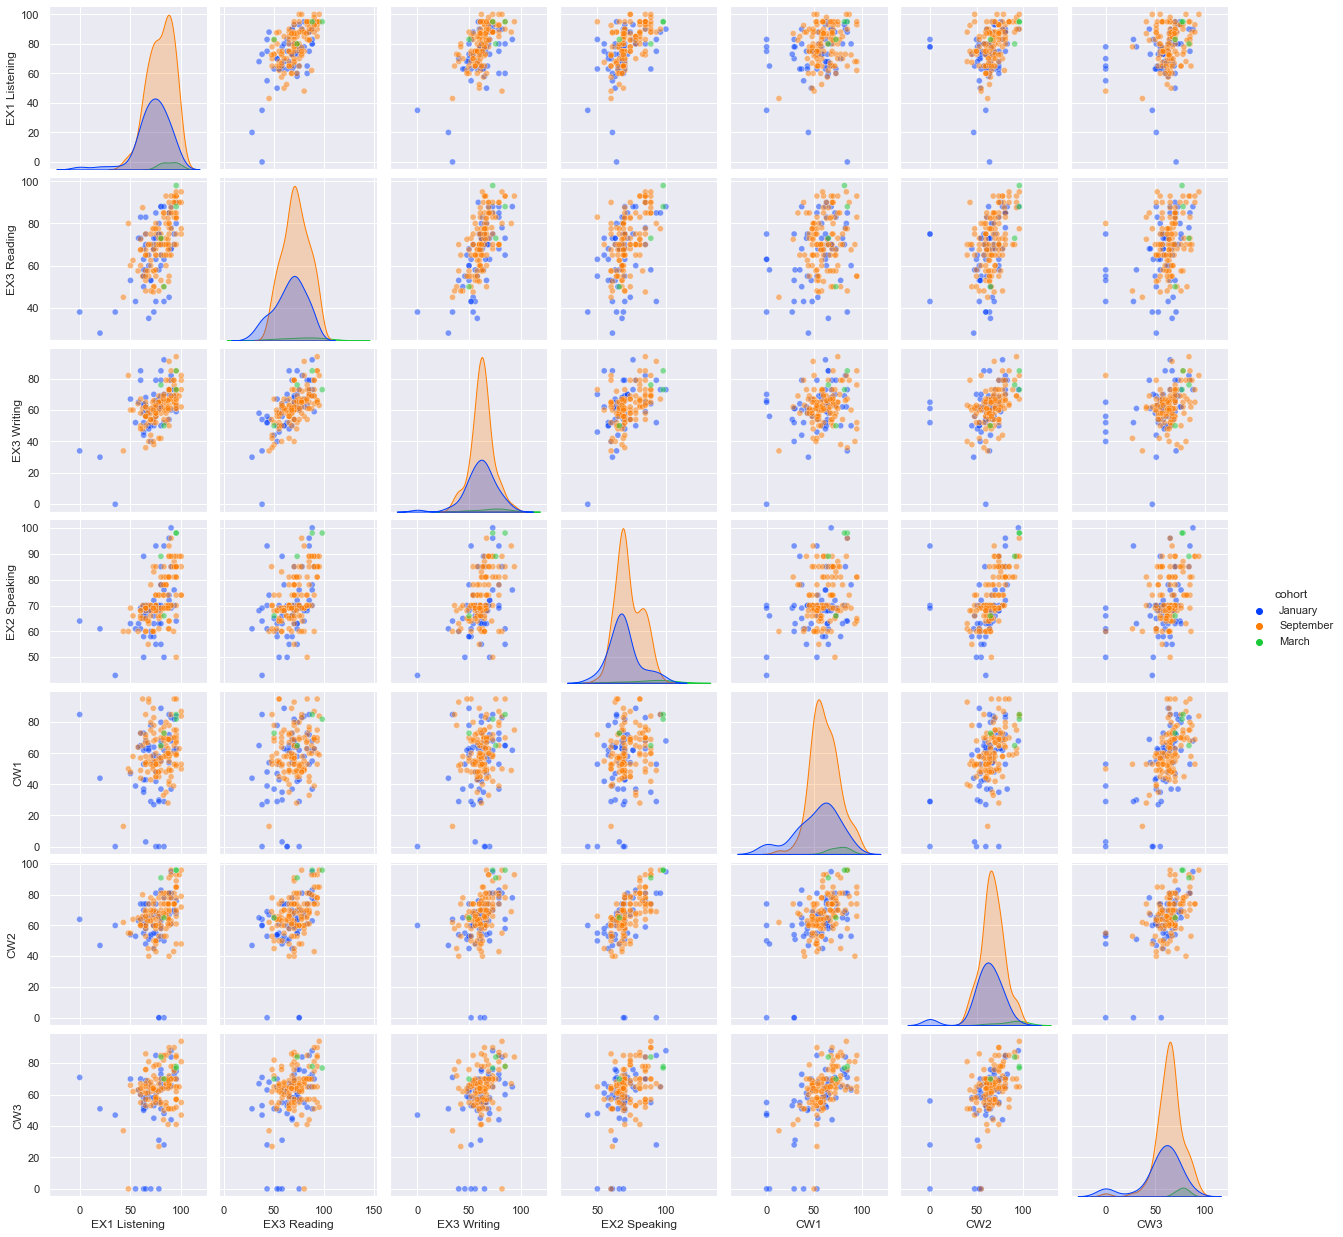

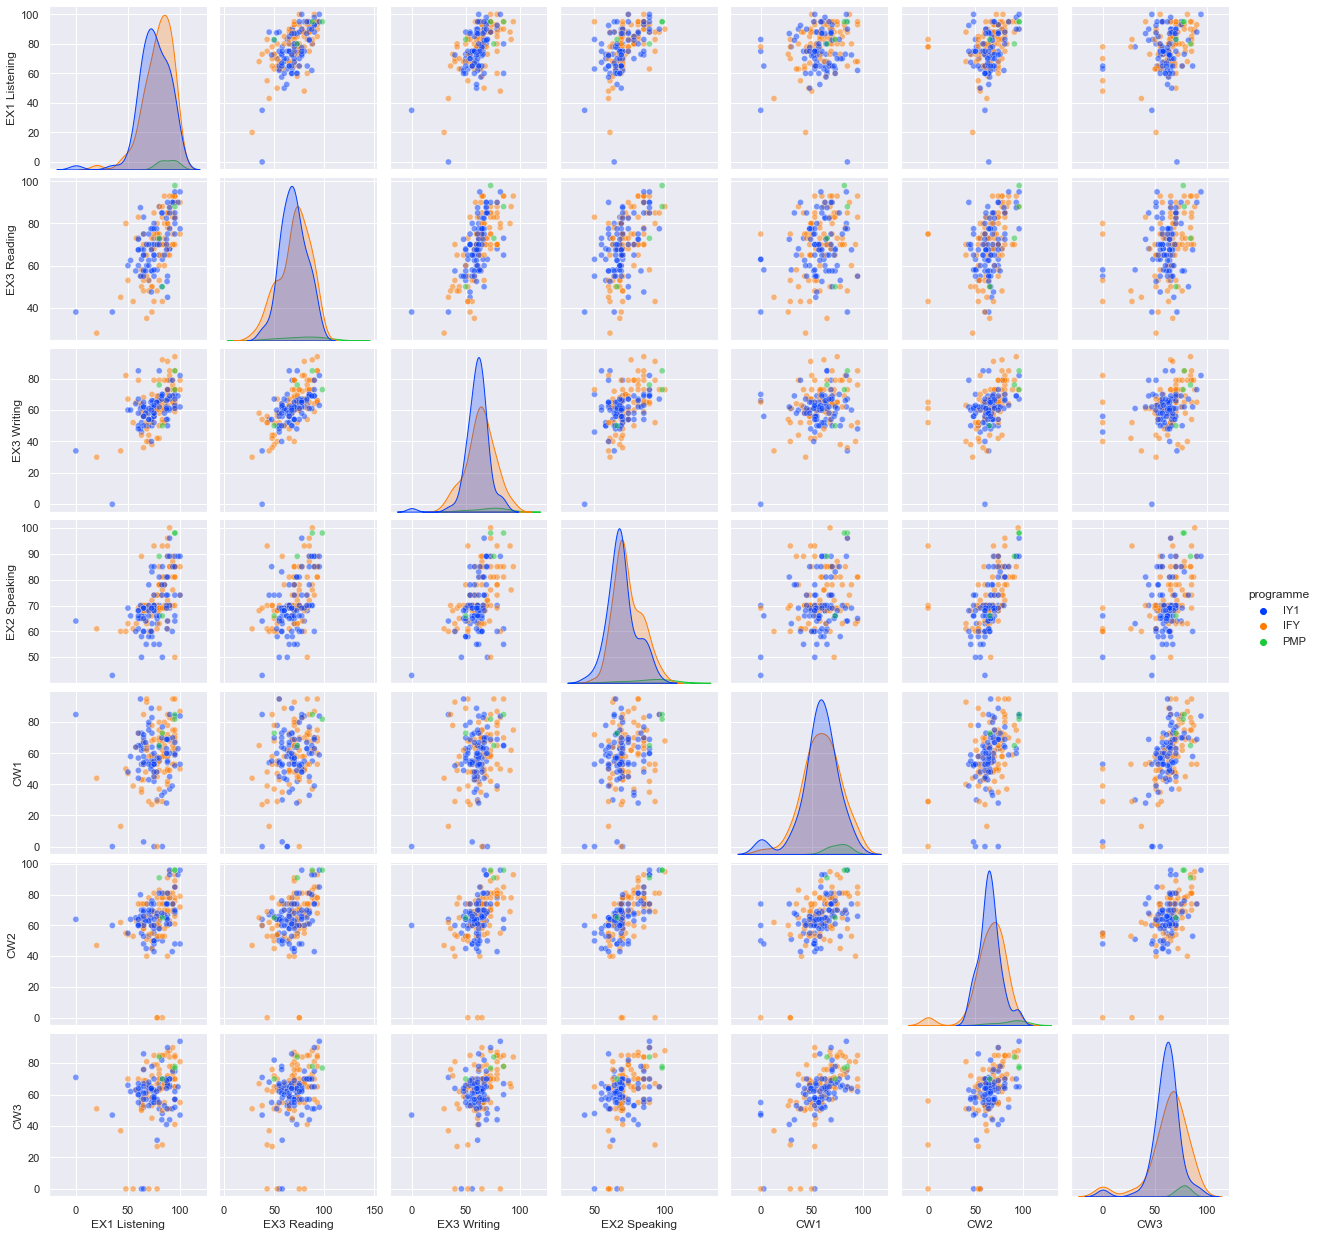

In [16]:
#pairplots
#all data
sns.pairplot(all_results)
plt.show()

#by cohort
sns.pairplot(all_results, hue="cohort", plot_kws={'alpha':0.5})

plt.show()

#by programme
sns.pairplot(all_results, hue="programme", plot_kws={'alpha':0.5})
plt.show()


In [17]:
#Pearson R correlation
#coursework correlations
def calc_corr(x, y):
  corr, pval = stats.pearsonr(all_results[x], all_results[y])
  return corr, pval

cw1_cw3_corr, cw1_cw3_pval = calc_corr("CW1", "CW3")

cw1_cw2_corr, cw1_cw2_pval = calc_corr("CW1", "CW2")


cw2_cw3_corr, cw2_cw3_pval = calc_corr("CW2", "CW3")

#exams correlations
ex1_ex2_corr, ex1_ex2_pval = calc_corr("EX1 Listening", "EX2 Speaking")

ex1_ex3r_corr, ex1_ex3r_pval = calc_corr("EX1 Listening", "EX3 Reading")

ex1_ex3w_corr, ex1_ex3w_pval = calc_corr("EX1 Listening", "EX3 Writing")

ex2_ex3r_corr, ex2_ex3r_pval = calc_corr("EX2 Speaking", "EX3 Reading")

ex2_ex3w_corr, ex2_ex3w_pval = calc_corr("EX2 Speaking", "EX3 Writing")

ex3r_ex3w_corr, ex3r_ex3w_pval = calc_corr("EX3 Reading", "EX3 Writing")

#skills correlations
ex2_cw2_corr, ex2_cw2_pval = calc_corr("EX2 Speaking", "CW2")

ex3w_cw3_corr, ex3w_cw2_pval = calc_corr("EX3 Writing", "CW3")

ex3r_cw1_corr, ex3r_cw1_pval = calc_corr("EX3 Reading", "CW1")



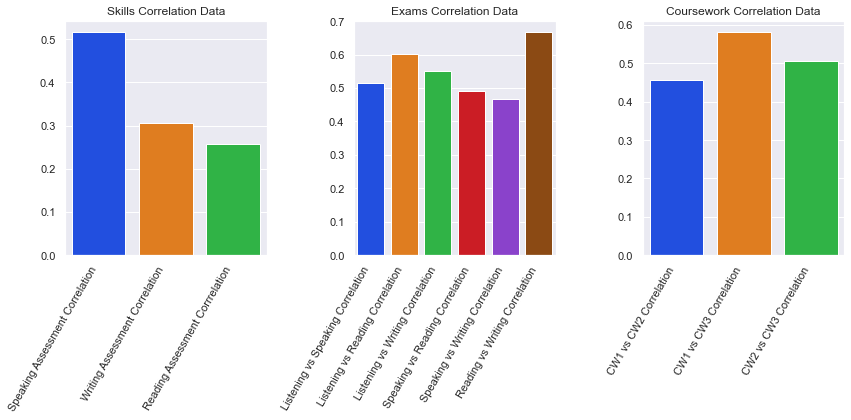

In [18]:
#plots of correlations
#tuples for plotting
skills_corr_data = [ex2_cw2_corr, ex3w_cw3_corr, ex3r_cw1_corr]
skills_corr_labels = ["Speaking Assessment Correlation", "Writing Assessment Correlation", "Reading Assessment Corrrelation"]

exams_corr_data = [ex1_ex2_corr, ex1_ex3r_corr, ex1_ex3w_corr,ex2_ex3r_corr, ex2_ex3w_corr, ex3r_ex3w_corr]
exams_corr_labels = ["Listening vs Speaking Correlation", "Listening vs Reading Correlation", "Listening vs Writing Correlation", "Speaking vs Reading Correlation", "Speaking vs Writing Correlation", "Reading vs Writing Correlation"]

coursework_corr_data = [cw1_cw2_corr, cw1_cw3_corr, cw2_cw3_corr]
coursework_corr_labels = ["CW1 vs CW2 Correlation", "CW1 vs CW3 Correlation", "CW2 vs CW3 Correlation"]


#barplots
fig, axs = plt.subplots(1,3, figsize=(12,6))
sns.barplot(x=skills_corr_labels, y=skills_corr_data, ax=axs[0])
axs[0].set_xticks(range(0, len(skills_corr_labels)))
axs[0].set_xticklabels(skills_corr_labels, rotation=60, ha="right")
axs[0].set_title("Skills Correlation Data")

sns.barplot(x=exams_corr_labels, y=exams_corr_data, ax=axs[1])
axs[1].set_xticks(range(0, len(exams_corr_labels)))
axs[1].set_xticklabels(exams_corr_labels, rotation=60, ha="right")
axs[1].set_title("Exams Correlation Data")

sns.barplot(x=coursework_corr_labels, y=coursework_corr_data, ax=axs[2])
axs[2].set_xticks(range(0, len(coursework_corr_labels)))
axs[2].set_xticklabels(coursework_corr_labels, rotation=60, ha="right")
axs[2].set_title("Coursework Correlation Data")

plt.tight_layout()
plt.show()

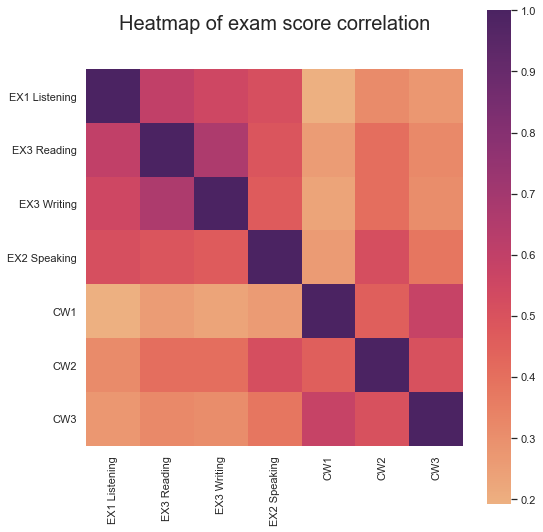

In [62]:
#heatmap for correlation


assessment_only = all_results[["EX1 Listening", "EX3 Reading", "EX3 Writing", "EX2 Speaking", "CW1", "CW2", "CW3"]].reset_index(drop=True)

corr = assessment_only.corr()

fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Heatmap of exam score correlation", fontsize=20, pad=40)
sns.heatmap(data=corr, cmap="flare", square=True, ax=ax)
plt.tight_layout()

plt.show()